In [9]:
import qiskit_ibm_runtime
print(qiskit_ibm_runtime.__version__)

0.40.1


In [10]:
import qiskit_aer
print(qiskit_aer.__version__)


0.17.1


In [11]:
from qiskit_aer import Aer
print(Aer.backends())

[AerSimulator('aer_simulator'), AerSimulator('aer_simulator_statevector'), AerSimulator('aer_simulator_density_matrix'), AerSimulator('aer_simulator_stabilizer'), AerSimulator('aer_simulator_matrix_product_state'), AerSimulator('aer_simulator_extended_stabilizer'), AerSimulator('aer_simulator_unitary'), AerSimulator('aer_simulator_superop'), QasmSimulator('qasm_simulator'), StatevectorSimulator('statevector_simulator'), UnitarySimulator('unitary_simulator')]


In [12]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save your IBM Cloud-based instance (this format is correct for cloud channel)
QiskitRuntimeService.save_account(
    token="rJVwqI6omYOBPtOSg78_XoHusk6bz8sQ1nf5vDsH0msq",
    instance="quantum-img-proc",  # Use only the instance name
    channel="ibm_cloud",
    overwrite=True
)

# Load the account using the IBM Cloud channel
service = QiskitRuntimeService(channel="ibm_cloud")
print(service.backends())

[<IBMBackend('ibm_torino')>, <IBMBackend('ibm_sherbrooke')>, <IBMBackend('ibm_brisbane')>]


Image (2x2 Grayscale):
[[  0  85]
 [170 255]]


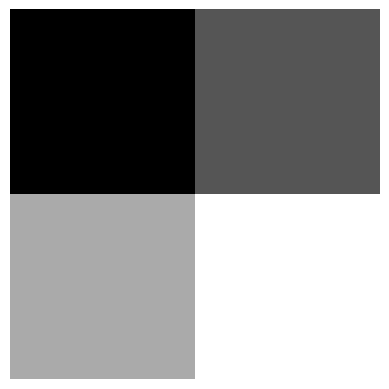

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Create a specific 2x2 image with given pixel values
image = np.array([[0, 85],
                  [170, 255]], dtype=np.uint8)

# Print image values
print("Image (2x2 Grayscale):")
print(image)

# Plot the image
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [14]:
import numpy as np

def pixel_to_theta(pixels):
    return (pixels * np.pi) / (2 * 255)

# Example for 4-pixel image:
pixels = np.array([0, 85, 170, 255])
thetas = pixel_to_theta(pixels)
print("θ values:", thetas)
print("2θ values (for RY):", 2 * thetas)

θ values: [0.         0.52359878 1.04719755 1.57079633]
2θ values (for RY): [0.         1.04719755 2.0943951  3.14159265]


Image:
 [[  0  85]
 [170 255]]

2θ values for RY rotations:
[0.         1.04719755 2.0943951  3.14159265]


c:\Users\coding\cwq\miniconda3\envs\cwq\Lib\site-packages\qiskit\visualization\circuit\matplotlib.py:270: UserWarning: Style JSON file 'iqx.json' not found in any of these locations: c:\Users\coding\cwq\miniconda3\envs\cwq\Lib\site-packages\qiskit\visualization\circuit\styles\iqx.json, iqx.json. Will use default style.
  self._style, def_font_ratio = load_style(


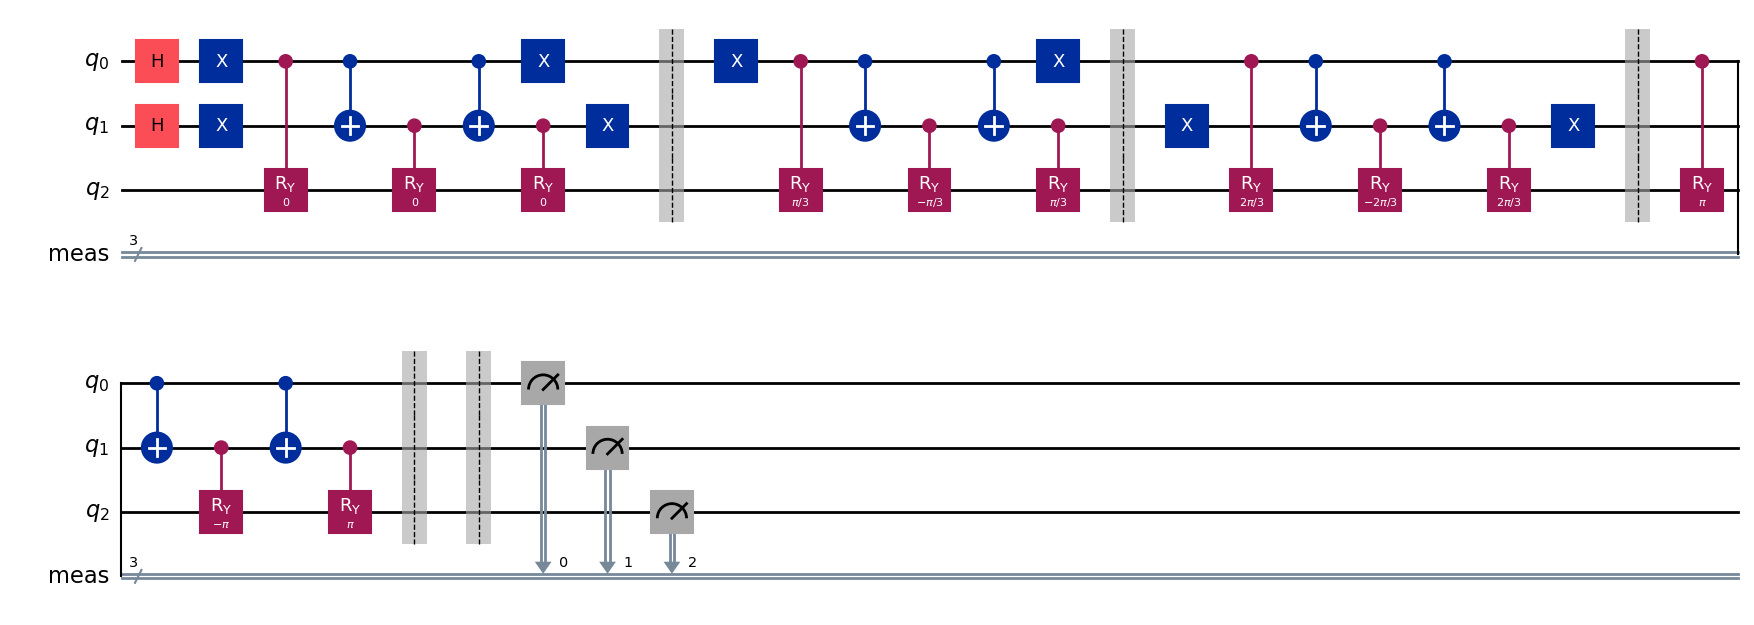

In [28]:
#**************#
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
import numpy as np
from math import pi
import matplotlib.pyplot as plt
from qiskit.visualization import matplotlib as qiskit_matplotlib

# Step 1: Prepare the grayscale image
image = np.array([[0, 85],
                  [170, 255]], dtype=np.uint8)
print("Image:\n", image)

# Step 2: Flatten and normalize pixels to θ
def pixel_to_theta(pixels):
    return (pixels * pi) / (2 * 255)

pixels = image.flatten()
thetas = 2 * pixel_to_theta(pixels)  # 2θ values for RY gate

print("\n2θ values for RY rotations:")
print(thetas)

# Step 3: Initialize quantum circuit (2 position qubits + 1 color qubit)
qc = QuantumCircuit(3)

# Apply Hadamard to position qubits to create superposition
qc.h(0)
qc.h(1)

# Step 4: Encode each pixel using multi-controlled RY (Toffoli-style)
for i, theta in enumerate(thetas):
    bin_idx = format(i, '02b')  # Binary index for control (00, 01, 10, 11)
    controls = [int(b) for b in bin_idx]

    # Apply X gates to set the controls to 1 (if needed)
    for qubit, bit in enumerate(controls):
        if bit == 0:
            qc.x(qubit)

    # Decomposed Toffoli-controlled RY
    qc.cry(theta, 0, 2)
    qc.cx(0, 1)
    qc.cry(-theta, 1, 2)
    qc.cx(0, 1)
    qc.cry(theta, 1, 2)

    # Reset control qubits back
    for qubit, bit in enumerate(controls):
        if bit == 0:
            qc.x(qubit)

    qc.barrier()

#Step 5: Add measurement
qc.measure_all()

#Step 6: Simulate using backend.run() (modern Qiskit method)
backend = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, backend)
job = backend.run(t_qc, shots=16384)
result = job.result()
counts = result.get_counts()

qc.draw(output='mpl', style='iqx')  # 'mpl' style using Matplotlib
import matplotlib.pyplot as plt
qc.draw(output='mpl', style='iqx', filename='frqi_circuit.png')


{'000': 986, '101': 807, '010': 769, '111': 1002, '110': 274, '001': 258}


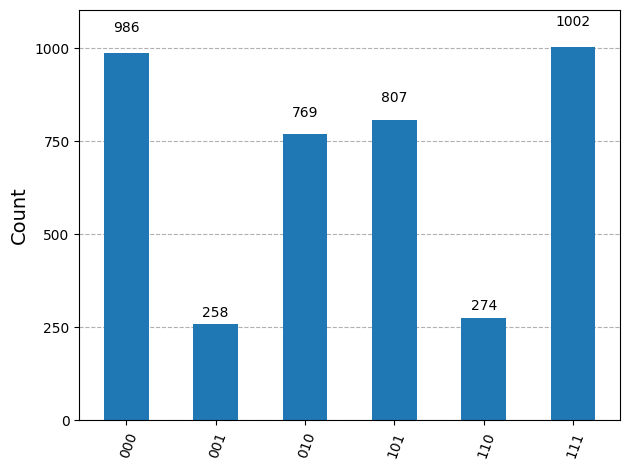

In [38]:
from qiskit_aer import Aer
from qiskit import transpile
from qiskit.visualization import plot_histogram

# Use the correct name of your circuit (qc, not qc1)
aer_sim = Aer.get_backend('aer_simulator')

# Transpile the circuit
t_qc = transpile(qc, aer_sim)

# Run the transpiled circuit
job = aer_sim.run(t_qc, shots=4096)
result = job.result()

# Get results
counts = result.get_counts(t_qc)

# Display result
print(counts)
plot_histogram(counts)

